In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading csv file

population=pd.read_excel('total_population.xlsx',header=None)
income=pd.read_excel('/content/income_scale.xlsx')
population.head(5)


,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,68
0,Data Source,World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Last Updated Date,45839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0,2024.0


In [3]:
population=population.drop(columns=[2,3],axis=1)


In [4]:
# changing data type of popuplation to int

population.loc[:,population.columns[2:]]=population.loc[:,population.columns[2:]].astype('Int64')


/tmp/ipython-input-4-2164831317.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<IntegerArray>
[      <NA>,       <NA>,       <NA>,       <NA>,       1960,      54922,
  130075728,    9035043,   97630925,    5231654,
 ...
      32500,   32531933,      64431, 3021512598,     112490,     984846,
    5532301,   16440172,    3153729,    3809389]
Length: 271, dtype: Int64' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  population.loc[:,population.columns[2:]]=population.loc[:,population.columns[2:]].astype('Int64')
/tmp/ipython-input-4-2164831317.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<IntegerArray>
[      <NA>,       <NA>,       <NA>,       <NA>,       1961,      55578,
  133534923,    9214083,   99706674,    5301583,
 ...
      34300,   33409059,      66264, 3062768116,     115496,    10

In [5]:
#setting index#4 as column
population.columns=population.iloc[4,:]

#creating df from idex #5 onwards including all col.s
population=population.iloc[5:,:]

#the reseting index number
population=population.reset_index(drop=True)


In [6]:
#dropping row that contains all null

population=population.drop(110)

In [7]:
population= population.reset_index(drop=True)

In [8]:
# copying population to pop2
pop2=population.copy()

#dropping first 2 col.s from pop2
pop2= pop2.drop(columns=['Country Name', 'Country Code'],axis=1)


In [9]:
#checking  row that contains all the null values
pop2[pop2.isnull().all(axis=1)].index


Index([], dtype='int64')

In [10]:


# dropping that row with all null values

pop2 = pop2.dropna(how='all')

In [11]:
#filling null values with a row-wise mean of population

#row wise mean is calculating average population across years(1960-2024)

for index,rows in pop2.iterrows():
  mean=pop2.mean(axis=1)[index]
  for col in pop2.columns:
      if pd.isna(rows[col]):
        pop2.at[index,col]= mean.round(0)


In [12]:
pop2=pop2.reset_index(drop=True)


In [13]:
#combining col.s from 2 dfs

population_final=pd.concat([population[['Country Name','Country Code']], pop2], axis=1)

#checking for any null row
population_final[population_final.isna().all(axis=1)].index

Index([], dtype='int64')

In [14]:

population_final.sample(n=5)

4,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
4,Angola,AGO,5231654,5301583,5354310,5408320,5464187,5521981,5581386,5641807,...,28157798,29183070,30234839,31297155,32375632,33451132,34532429,35635029,36749906,37885849
99,Croatia,HRV,4140181,4167292,4196712,4225675,4252876,4280923,4310701,4338683,...,4151725,4106867,4041407,3988775,3949390,3914206,3878981,3855641,3859686,3866300
213,Serbia,SRB,6638992,6689077,6740264,6787950,6832855,6876624,6927969,6966522,...,7095383,7058322,7020858,6982604,6945235,6899126,6834326,6664449,6623183,6587202
116,Jamaica,JAM,1650005,1673261,1696932,1721099,1745568,1769192,1791475,1812865,...,2802534,2809915,2815764,2820097,2823271,2830739,2837682,2839144,2839786,2839175
208,Solomon Islands,SLB,139688,142912,146201,149589,153085,156686,160393,164245,...,639415,662379,685672,709101,728147,744498,762591,781066,800005,819198


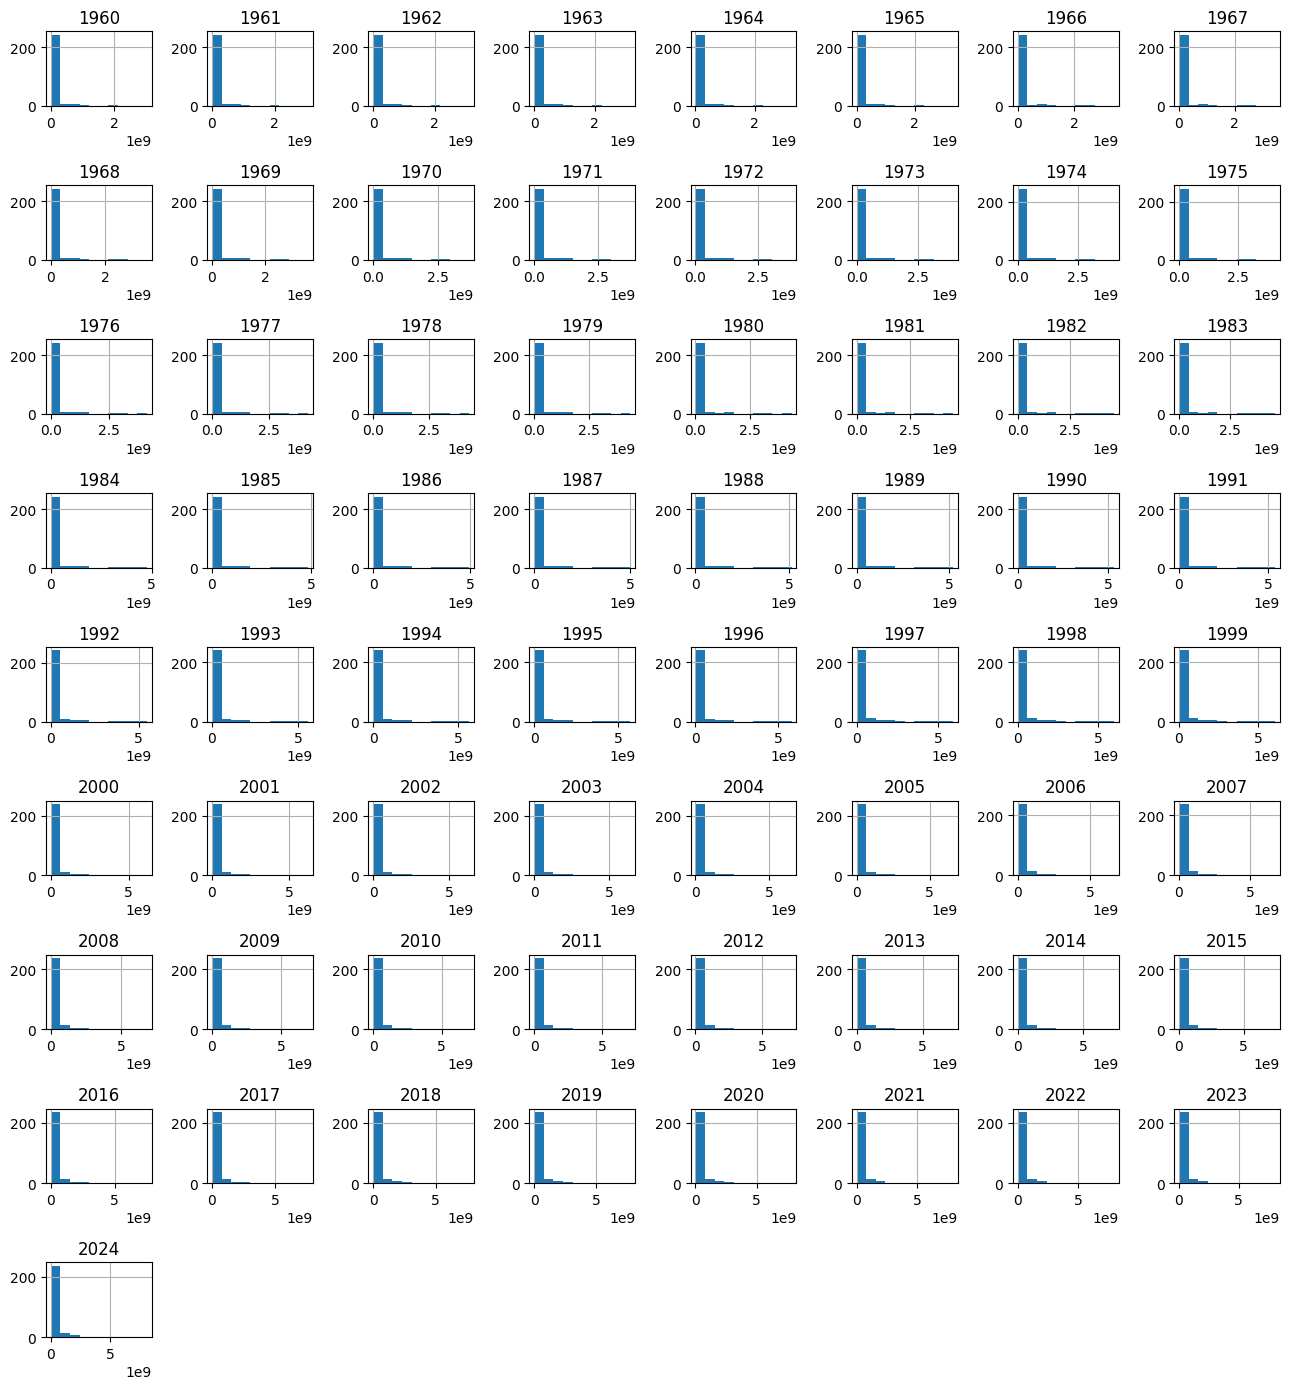

In [15]:

population_final.hist(figsize=(13,14))
plt.tight_layout()
plt.show()

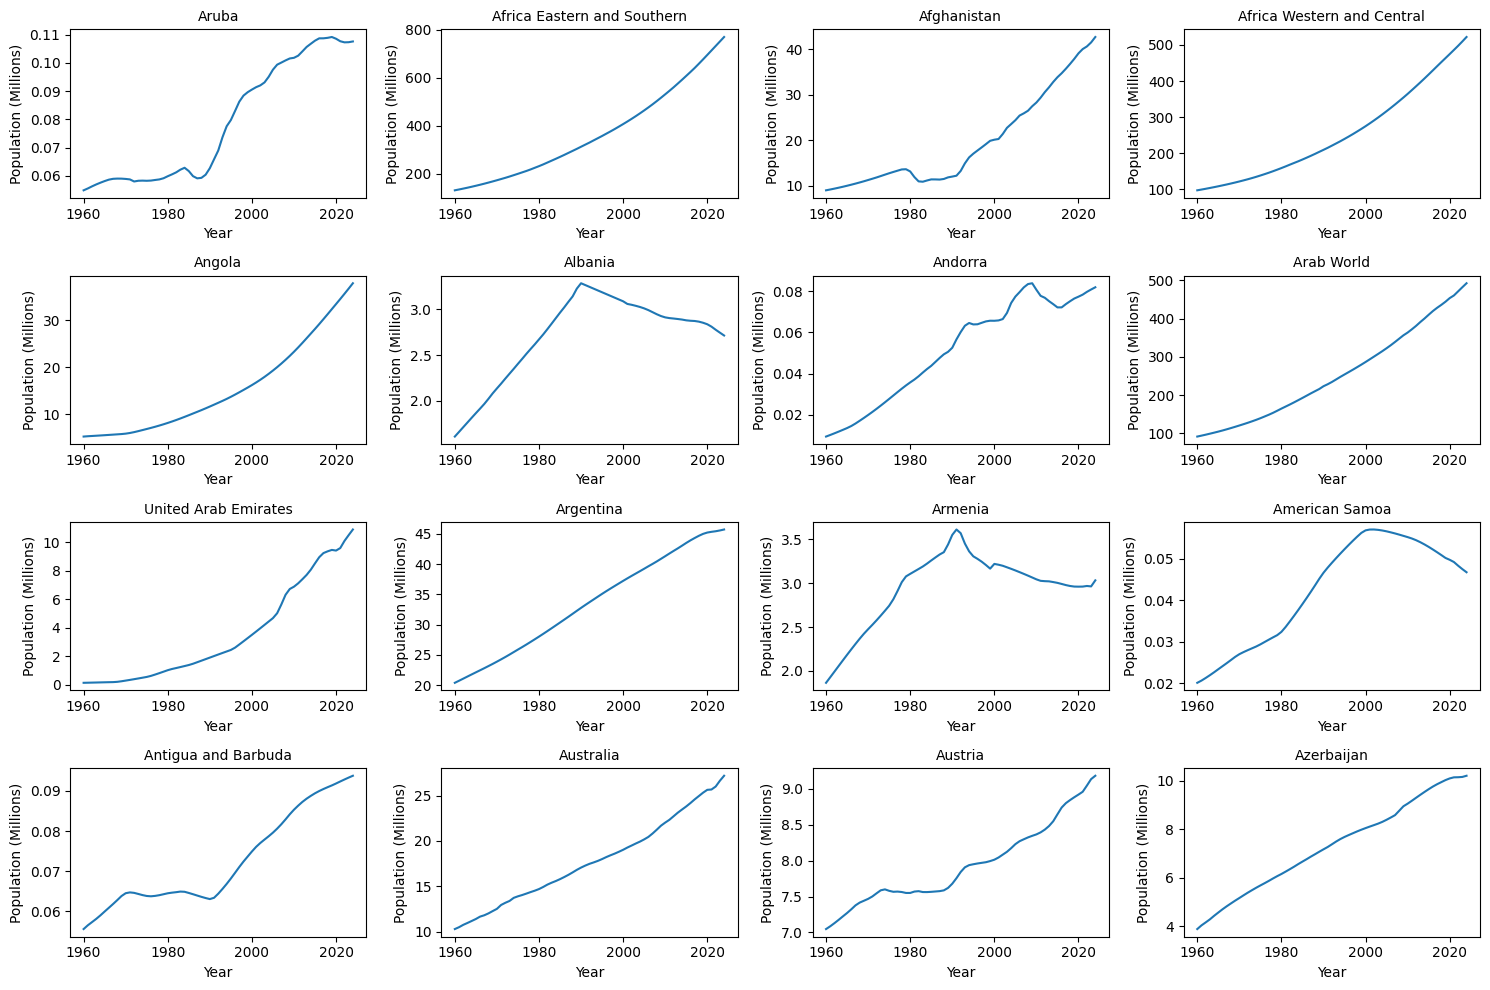

In [16]:


# Create a 4x4 grid (16 plots) in one figure

fig, axes = plt.subplots(4, 4, figsize=(15, 10))
axes = axes.flatten()  # convert 2D array of axes into 1D for easy iteration

for i in range(16):  # first 16 countries
    axes[i].plot(population_final.loc[i, 1960:2024].astype(float) / 1e6)
    axes[i].set_title(population_final.loc[i, 'Country Name'], fontsize=10)
    axes[i].set_xlabel("Year")
    axes[i].set_ylabel("Population (Millions)")

# Adjust layout so charts and labels don’t overlap
plt.tight_layout()
plt.show()


In [17]:
income=income.dropna(subset=['IncomeGroup'])
income=income.reset_index(drop=True)

In [18]:
population_income=population_final.merge(income[['IncomeGroup','TableName']], left_on='Country Name',right_on='TableName')
population_income=population_income.drop(columns=['TableName'],axis=1)


/tmp/ipython-input-19-865079606.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_pop.values, y=avg_pop.index, palette='viridis')


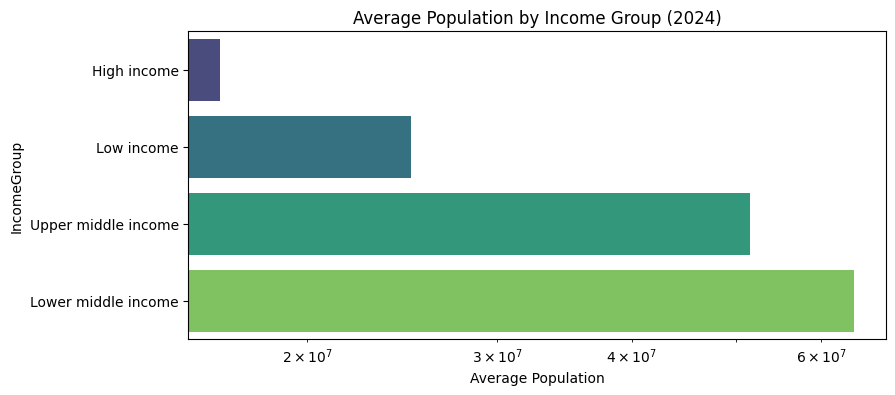

/tmp/ipython-input-19-865079606.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count_countries.values, y=count_countries.index, palette='plasma')


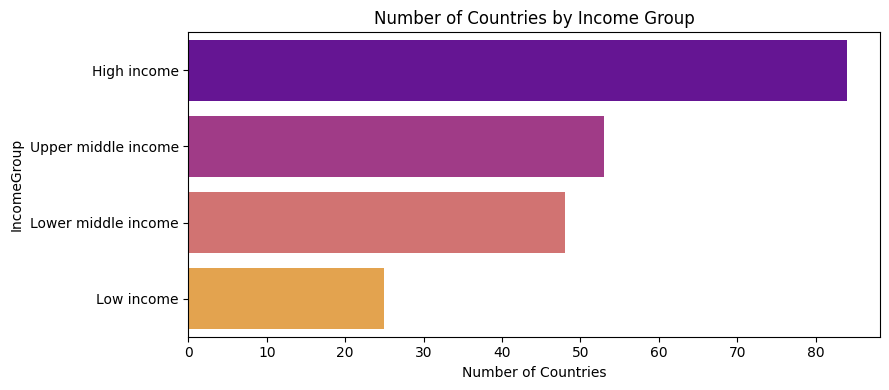

In [19]:

# Assuming your dataframe is df

# --- 1. Average population by Income Group (2024) ---
avg_pop = population_income.groupby('IncomeGroup')[2024].mean().sort_values()

plt.figure(figsize=(9,4))
sns.barplot(x=avg_pop.values, y=avg_pop.index, palette='viridis')
plt.title('Average Population by Income Group (2024)')
plt.xlabel('Average Population')
plt.xscale('log')  # use log scale so differences are clearer
#plt.tight_layout()
plt.show()

# --- 2. Number of countries in each Income Group ---
count_countries = population_income['IncomeGroup'].value_counts()

plt.figure(figsize=(9,4))
sns.barplot(x=count_countries.values, y=count_countries.index, palette='plasma')
plt.title('Number of Countries by Income Group')
plt.xlabel('Number of Countries')
plt.tight_layout()
plt.show()
